In [5]:
from automatic_models.utils.helpers import write_list_to_txt
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line, hough_circle, hough_circle_peaks
from skimage.feature import canny
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px
from skimage.draw import circle_perimeter
from skimage import data, color
from line_detector import detect_straight_lines
from pathlib import Path

In [26]:
x = Path.cwd()

In [30]:
(x / 'ala_ma_kota' / 'costamcostam').mkdir(parents=True)

FileExistsError: [Errno 17] File exists: '/home/skocznapanda/programming/BSc-soccer-annotator/automatic_models/line_detection/ala_ma_kota/costamcostam'

In [2]:
img = cv2.imread('../data/barcelona_valencia_frames/raw_frames/frame_100.jpg')


In [3]:
lines = detect_straight_lines(img)


In [4]:
write_list_to_txt(lines, output_path='random.txt')

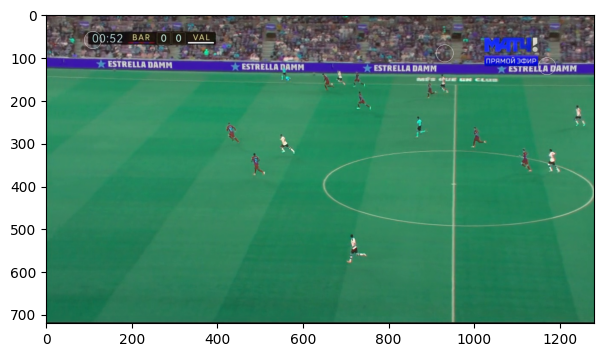

In [34]:
img = cv2.imread('../data/barcelona_valencia_frames/raw_frames/frame_100.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    img[circy, circx] = (225, 225, 225)

ax.imshow(img)
plt.show()

In [37]:
for el in zip(cx, cy, radii):
    print(el)

(109, 58, 20)
(1170, 119, 20)
(931, 89, 20)


In [24]:
prcx

array([ 109, 1170,  931])

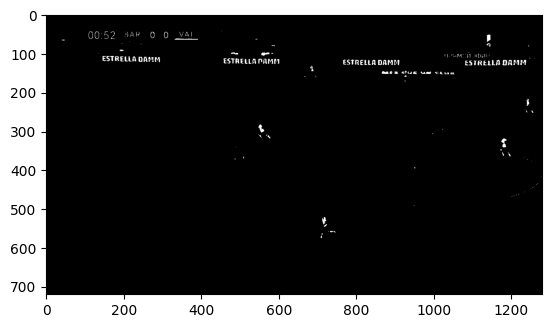

In [15]:
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)